In [170]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import layers, Sequential, preprocessing

In [171]:
BATCH_SIZE = 30
IMAGE_SIZE = 100
data_dir = os.path.join('data/')
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
class_names = train_ds.class_names
print(class_names)

Found 4933 files belonging to 3 classes.
Using 3947 files for training.
Found 4933 files belonging to 3 classes.
Using 986 files for validation.
['onion', 'orange', 'unknown']


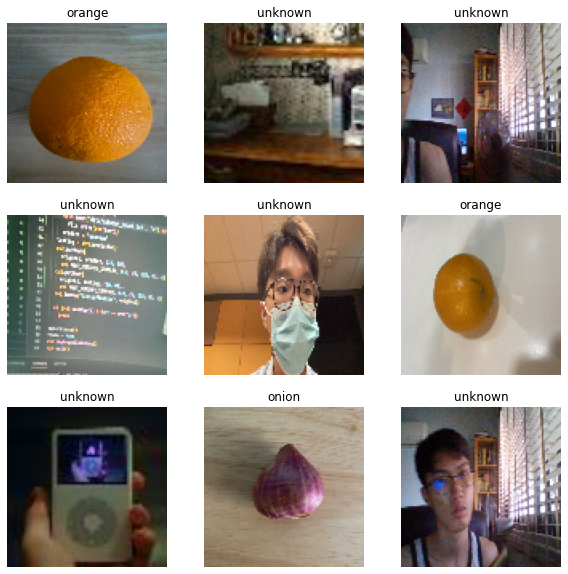

In [173]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [174]:
# # normaliszation-train
# normalization_layer = tf.keras.layers.Rescaling(1. / 255)
# train_ds = train_ds.map(lambda x, y:(normalization_layer(x), y))
# image_batch,labels_batch = next(iter(train_ds))
# first_image = image_batch[0]

# # normaliszation-valid
# normalization_layer = tf.keras.layers.Rescaling(1. / 255)
# val_ds = val_ds.map(lambda x, y:(normalization_layer(x), y))
# image_batch, labels_batch = next(iter(val_ds))
# first_image = image_batch[0]

In [175]:
# # RGB channel are [0, 255], this standardise values to [0, 1]
# normalization_layer = layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [176]:
model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3), # dropping number of connections by 50%
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3), # dropping number of connections by 50%
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(3, activation = 'softmax'),
])
# compiling and optimizer
# To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.
model.compile(
	optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['accuracy'])

In [177]:
# train model
history = model.fit(
	train_ds,
	validation_data = val_ds,
	epochs = 10
)
model.summary()

Epoch 1/10


/Users/nicholasbay/miniforge3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-01 21:35:17.916226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.8247

2022-07-01 21:37:09.421977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 137s 983ms/step - loss: 0.4301 - accuracy: 0.8247 - val_loss: 0.0642 - val_accuracy: 0.9909
Epoch 2/10
132/132 [==============================] - 16s 118ms/step - loss: 0.0344 - accuracy: 0.9914 - val_loss: 0.0264 - val_accuracy: 0.9929
Epoch 3/10
132/132 [==============================] - 15s 115ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0168 - val_accuracy: 0.9939
Epoch 4/10
132/132 [==============================] - 16s 120ms/step - loss: 7.4892e-04 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9970
Epoch 5/10
132/132 [==============================] - 15s 110ms/step - loss: 2.1341e-04 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9970
Epoch 6/10
132/132 [==============================] - 14s 104ms/step - loss: 1.0637e-04 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 0.9980
Epoch 7/10
132/132 [==============================] - 21s 158ms/step - loss: 7.2030e-05 - accuracy: 1.0000 - val_loss: 0.0167 - 

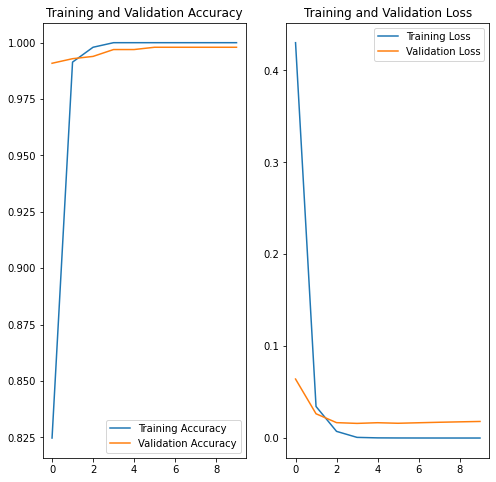

Testing model:
33/33 [==============================] - 1s 38ms/step - loss: 0.0181 - accuracy: 0.9980


In [178]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("Testing model:")
model.evaluate(val_ds)

# saving model as .hdf5
tf.keras.models.save_model(model, 'model.hdf5')